## Cifar 10 classification using Transfer Learning

## Import Libraries And Load Dataset



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.layers import Dense,Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
import tensorflow.keras.utils as ku
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [3]:
import tensorflow as tf
tf.__version__

'2.8.2'

In [4]:
from tensorflow.keras.datasets import cifar10

In [5]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 13s 0us/step


## Prepare The Dataset



In [6]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [7]:
x_train=x_train/255
x_test=x_test/255

In [8]:
y_train = ku.to_categorical(y_train, 10)
y_test = ku.to_categorical(y_test, 10)

## Building Transfer Learning Models

In [9]:
vgg = VGG19(input_shape=(32,32,3), weights='imagenet', include_top=False)

80150528/80134624 [==============================] - 1s 0us/step


In [10]:
for layer in vgg.layers:
  layer.trainable = False

In [11]:
x = Flatten()(vgg.output)

In [12]:
x=Dense(units=1024,activation='relu')(x)
x=Dense(units=512,activation='relu')(x)
x=Dropout(0.3)(x)
x=Dense(units=256,activation='relu')(x)
x=Dropout(0.2)(x)
x=Dense(units=128,activation='relu')(x)
prediction = Dense(units=10, activation='softmax')(x)

In [13]:
model = Model(inputs=vgg.input, outputs=prediction)

In [14]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [15]:
model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])

In [16]:
train_datagen = ImageDataGenerator(
       horizontal_flip=False,
       zoom_range=.1 )


train_datagen.fit(x_train)

In [17]:
# fits the model on batches with real-time data augmentation:
history=model.fit_generator(train_datagen.flow(x_train, y_train, batch_size=150),
                    steps_per_epoch=len(x_train) / 150, epochs=20,
                    validation_data=(x_test,y_test),
                    validation_steps=len(x_test)/150)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


333/333 [==============================] - 35s 70ms/step - loss: 1.5433 - accuracy: 0.4484 - val_loss: 1.3146 - val_accuracy: 0.5379
Epoch 2/20
333/333 [==============================] - 22s 67ms/step - loss: 1.3252 - accuracy: 0.5378 - val_loss: 1.2330 - val_accuracy: 0.5680
Epoch 3/20
333/333 [==============================] - 22s 67ms/step - loss: 1.2494 - accuracy: 0.5625 - val_loss: 1.2015 - val_accuracy: 0.5770
Epoch 4/20
333/333 [==============================] - 22s 67ms/step - loss: 1.2016 - accuracy: 0.5806 - val_loss: 1.2139 - val_accuracy: 0.5754
Epoch 5/20
333/333 [==============================] - 23s 69ms/step - loss: 1.1546 - accuracy: 0.5956 - val_loss: 1.2241 - val_accuracy: 0.5719
Epoch 6/20
333/333 [==============================] - 22s 67ms/step - loss: 1.1186 - accuracy: 0.6055 - val_loss: 1.1667 - val_accuracy: 0.5937
Epoch 7/20
333/333 [==============================] - 22s 67ms/step - loss: 1.0871 - accuracy: 0.6184 - val_loss: 1.1547 - val_accuracy: 0.6060
Epo

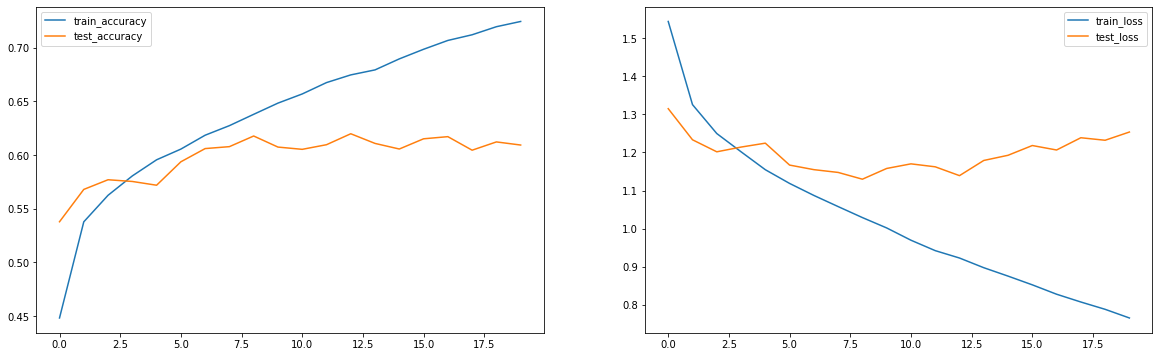

In [18]:
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(20,6))
ax1.plot(history.history['accuracy'],label='train_accuracy')
ax1.plot(history.history['val_accuracy'],label='test_accuracy')
ax1.legend()
ax2.plot(history.history['loss'],label='train_loss')
ax2.plot(history.history['val_loss'],label='test_loss')
ax2.legend()
plt.show()